# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('2016_to_2020_flight_reduced_columns_with_weather_top_10.csv')
df.head()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (28,45,47,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,...,Snow,Storm,Other Precipitation,Severe-Cold_Severity,Fog_Severity,Hail_Severity,Rain_Severity,Snow_Severity,Storm_Severity,Other Precipitation_Severity
0,0,2016,1,1,6,3,2016-01-06,AA,19805,43,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2016,1,1,7,4,2016-01-07,AA,19805,43,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2016,1,1,8,5,2016-01-08,AA,19805,43,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2016,1,1,9,6,2016-01-09,AA,19805,43,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2016,1,1,10,7,2016-01-10,AA,19805,43,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['Unnamed: 0', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'FlightDate', 'Reporting_Airline', 'DOT_ID_Reporting_Airline',
       'Flight_Number_Reporting_Airline', 'Origin', 'OriginCityName',
       'OriginState', 'Dest', 'DestCityName', 'DestState', 'CRSDepTime',
       'DepTime', 'DepDelay', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn',
       'CRSArrTime', 'ArrTime', 'ArrDelay', 'CRSElapsedTime', 'Cancelled',
       'CancellationCode', 'Diverted', 'Flights', 'Distance', 'DivArrDelay',
       'DivActualElapsedTime', 'DepTimeLocal', 'DepTimeUTC', 'Severe-Cold',
       'Fog', 'Hail', 'Rain', 'Snow', 'Storm', 'Other Precipitation',
       'Severe-Cold_Severity', 'Fog_Severity', 'Hail_Severity',
       'Rain_Severity', 'Snow_Severity', 'Storm_Severity',
       'Other Precipitation_Severity'],
      dtype='object')

## Summary Statistics

In [4]:
df.shape

(9142933, 50)

In [5]:
# since our outcome features are 'DepDelay'and 'ArrDelay', we drop any rows without these inputs
df = df.dropna(subset=['DepDelay', 'ArrDelay'])
df.shape

(8970081, 50)

In [6]:
df[['DepDelay','ArrDelay']].describe()

,DepDelay,ArrDelay
count,8.970081e+06,8.970081e+06
mean,1.009692e+01,4.959259e+00
std,4.072959e+01,4.302193e+01
min,-2.340000e+02,-2.380000e+02
25%,-5.000000e+00,-1.400000e+01
50%,-2.000000e+00,-5.000000e+00
75%,7.000000e+00,8.000000e+00
max,2.710000e+03,2.692000e+03


<AxesSubplot:>

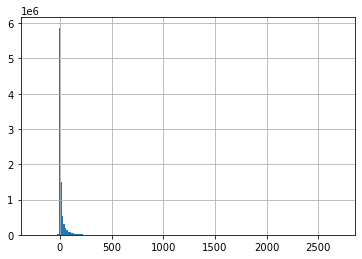

In [7]:
df['DepDelay'].hist(bins=200)

In [8]:
noDelay = df.loc[df['DepDelay']<=0]
len(noDelay)/df.shape[0]

0.6322490287434417

In [9]:
noDelay = df.loc[df['ArrDelay']<=0]
len(noDelay)/df.shape[0]

0.637338726372705

In [14]:
yesDelay = df.loc[(df['ArrDelay']>0) & (df['DepDelay']>0)]
yesDelay[['DepDelay','ArrDelay']].describe()

,DepDelay,ArrDelay
count,2.364521e+06,2.364521e+06
mean,4.598803e+01,4.473380e+01
std,6.692008e+01,6.706396e+01
min,1.000000e+00,1.000000e+00
25%,1.100000e+01,1.000000e+01
50%,2.600000e+01,2.400000e+01
75%,5.600000e+01,5.400000e+01
max,2.710000e+03,2.692000e+03


From analysis above, we see that about 63% of the total flights do not have delays. Out of the flights that do have delays, 50% delay under 26 minutes, 75% delay under 56 minutes. However, there are some very large values, as the largest being 2700 minutes, which is about 45 hours. To see how many of these large values there are and whether they are outliers, we do further analysis as the following:

In [15]:
delay2000 = df.loc[df['DepDelay']>2000][['DepDelay','ArrDelay']]
len(delay2000)

5

In [16]:
delay1000 = df.loc[df['DepDelay']>1000][['DepDelay','ArrDelay']]
len(delay1000)

850

In [17]:
delay500 = df.loc[df['DepDelay']>500][['DepDelay','ArrDelay']]
len(delay500)

7438

In [18]:
len(delay500)/len(yesDelay)

0.003145668826794095

In [20]:
delay250 = df.loc[df['DepDelay']>250][['DepDelay','ArrDelay']]
len(delay250)/len(yesDelay)

0.014279424881403041

Only 1% of the total delayed flights have delay time greater than 250 minutes. So let's go with the a short delay subset of delay time between 0 and 250 min.

## Plotting

<AxesSubplot:>

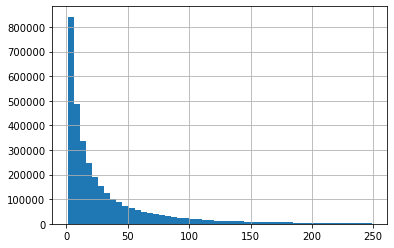

In [23]:
shortDelay = df.loc[(df['DepDelay']>0) & (df['DepDelay']<=250)]
shortDelay['DepDelay'].hist(bins=50)

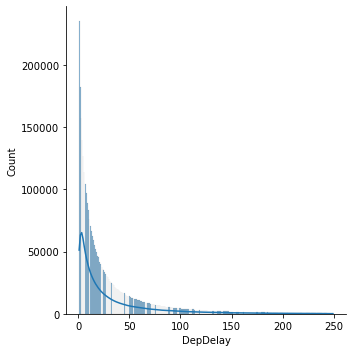

In [24]:
sns.displot(shortDelay['DepDelay'], kde=True)

<AxesSubplot:xlabel='DepDelay', ylabel='Count'>

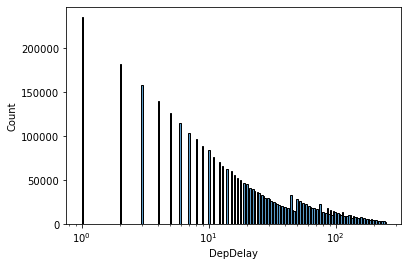

In [27]:
sns.histplot(
    shortDelay,
    x='DepDelay', 
    log_scale=True
)

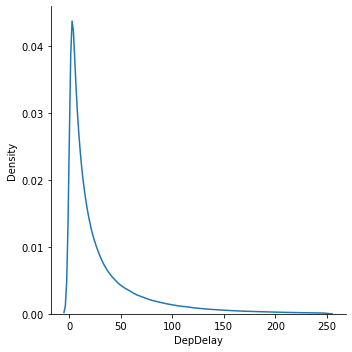

In [28]:
sns.displot(
    shortDelay,
    x='DepDelay', 
    kind = 'kde'
    )

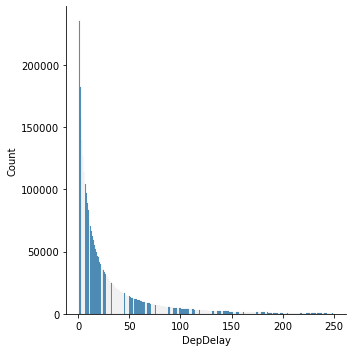

In [29]:
sns.displot(
    shortDelay,
    x='DepDelay', 
    kind = 'hist'
    )

## Visualize features

### Month

<AxesSubplot:>

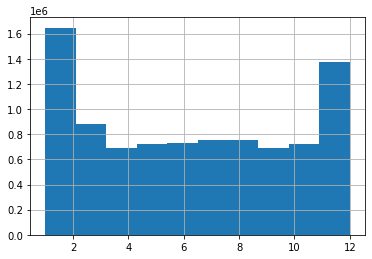

In [31]:
df.Month.hist()

There are more flights during the Christmas times.

In [69]:
df_months = df.groupby(['Month'])['DepDelay', 'ArrDelay'].mean()
df_months

<ipython-input-69-7d8067097c8f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_months = df.groupby(['Month'])['DepDelay', 'ArrDelay'].mean()


,DepDelay,ArrDelay
Month,,
1,8.987248,3.349081
2,9.329574,3.398623
3,7.594809,1.901583
4,9.533913,4.488498
5,10.855207,6.298272
6,15.187100,11.099304
7,15.067820,10.735317
8,13.305709,8.819734
9,6.720369,1.622427


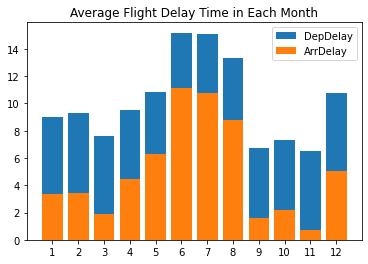

In [70]:
plt.bar(df_months.index,df_months['DepDelay'],label='DepDelay')
plt.bar(df_months.index,df_months['ArrDelay'],label='ArrDelay')
plt.xticks(df_months.index)
plt.title('Average Flight Delay Time in Each Month')
plt.legend()
plt.show()

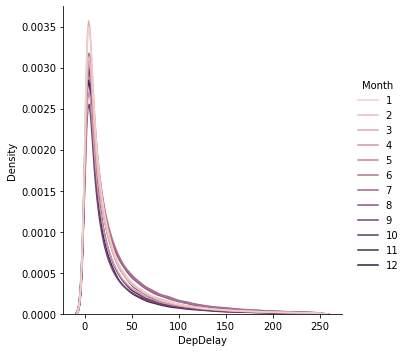

In [36]:
sns.displot(
    shortDelay,
    x='DepDelay', hue='Month',
    kind = 'kde',
)

<AxesSubplot:xlabel='Month', ylabel='DepDelay'>

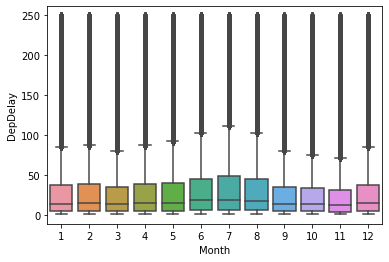

In [38]:
sns.boxplot(
    data=shortDelay,
    y="DepDelay", x="Month"
)

### Airlines

In [42]:
# airline_codes = df['Reporting_Airline'].unique()
# airline_codes

array(['AA', 'AS', 'B6', 'DL', 'VX', 'WN', 'UA', 'OO', 'F9', 'HA', 'NK',
       'EV', '9E', 'G4', 'MQ', 'OH', 'YV', 'YX'], dtype=object)

In [12]:
# airline_names = ['American Airlines', 'Alaska Airlines', 'JetBlue', 'Delta', 'Virgin America', 'Southwest Airlines', 'United Airlines', 'SkyWest Airlines', 'Frontier Airlines', 'Hawaiian Airlines', 'Spirit Airlines', 'EVA Air']
# len(airline_names)

12

<AxesSubplot:>

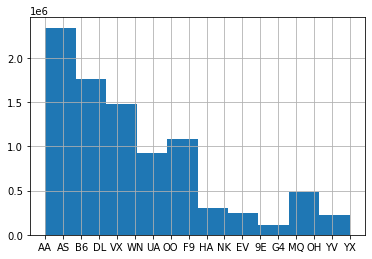

In [32]:
df.Reporting_Airline.hist()

In [71]:
df_airlines = df.groupby(['Reporting_Airline'])['DepDelay', 'ArrDelay'].mean()
df_airlines

<ipython-input-71-eb6853cdd028>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_airlines = df.groupby(['Reporting_Airline'])['DepDelay', 'ArrDelay'].mean()


,DepDelay,ArrDelay
Reporting_Airline,,
9E,8.820973,3.091993
AA,10.442846,6.324813
AS,4.132516,0.688262
B6,18.723035,12.955568
DL,8.190888,0.577141
EV,11.927574,8.178031
F9,14.503651,8.459543
G4,5.447128,3.120468
HA,7.962961,3.591336


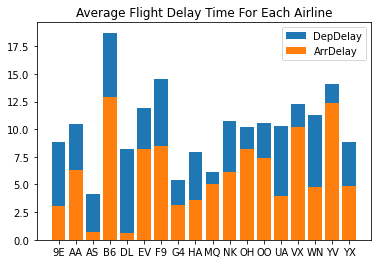

In [72]:
plt.bar(df_airlines.index,df_airlines['DepDelay'],label='DepDelay')
plt.bar(df_airlines.index,df_airlines['ArrDelay'],label='ArrDelay')
plt.title('Average Flight Delay Time For Each Airline')
plt.legend()
plt.show()

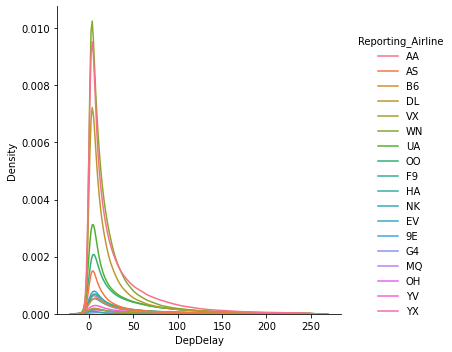

In [37]:
# Not good
# sns.displot(
#     shortDelay,
#     x='DepDelay', hue='Reporting_Airline',
#     kind = 'kde',
# )

<AxesSubplot:xlabel='Reporting_Airline', ylabel='DepDelay'>

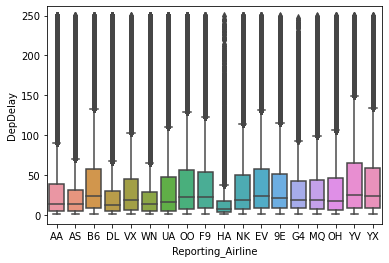

In [39]:
sns.boxplot(
    data=shortDelay,
    y="DepDelay", x="Reporting_Airline"
)

### Airports

<AxesSubplot:>

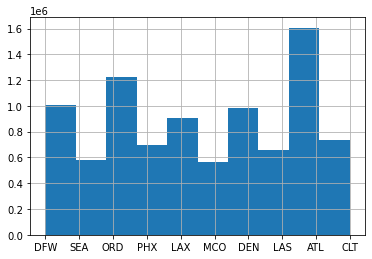

In [33]:
df.Origin.hist()

In [73]:
df_airports = df.groupby(['Origin'])['DepDelay', 'ArrDelay'].mean()
df_airports

<ipython-input-73-d2f53b5269bd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_airports = df.groupby(['Origin'])['DepDelay', 'ArrDelay'].mean()


,DepDelay,ArrDelay
Origin,,
ATL,9.015955,2.512978
CLT,9.602507,5.935312
DEN,10.214308,4.817213
DFW,11.463171,8.356741
LAS,9.942201,4.245567
LAX,10.314158,3.458775
MCO,12.041855,6.341227
ORD,12.409299,8.619738
PHX,8.008112,2.974556


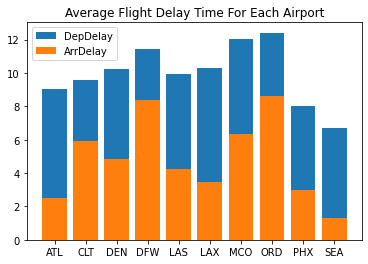

In [74]:
plt.bar(df_airports.index,df_airports['DepDelay'],label='DepDelay')
plt.bar(df_airports.index,df_airports['ArrDelay'],label='ArrDelay')
plt.title('Average Flight Delay Time For Each Airport')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Origin', ylabel='DepDelay'>

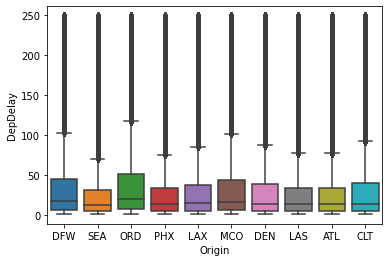

In [42]:
sns.boxplot(
    data=shortDelay,
    y="DepDelay", x="Origin"
)